In [167]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#I had a poblem with exessing .xls file so I converted it into .xlsx format.
file_path = 'Lab4_Datasetі/En_In.xlsx'

# Skip first 16 rows and remove footer rows (last 38 raws)
df = pd.read_excel(file_path, header=16, skipfooter=38)

df = df.iloc[:, 2:]  # Drop the first two unnecessary columns
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
df.replace("...", np.nan, inplace=True)  # Replace missing values with NaN
df['Energy Supply'] = df['Energy Supply'] * 1_000_000  # Convert to gigajoules

display(df)



,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,NaN,PetajoulesPetajoulesPetajoulesPetajoulesPetajo...,Gigajoules,%
1,Afghanistan,321000000,10,78.66928
2,Albania,102000000,35,100
3,Algeria,1959000000,51,0.55101
4,American Samoa,NaN,NaN,0.641026
...,...,...,...,...
223,Viet Nam,2554000000,28,45.32152
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344000000,13,0
226,Zambia,400000000,26,99.71467


In [168]:
# Task 3: Clean country names
df['Country'] = df['Country'].str.replace(r"\s*\(.*\)", "", regex=True)  # Remove text in parentheses
df['Country'] = df['Country'].str.replace(r"\d", "", regex=True)  # Remove digits from country names

# Task 4: Rename specific countries
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
df['Country'] = df['Country'].replace(rename_dict)


# Create a filtered DataFrame with renamed countries
renamed_countries = list(rename_dict.values())
renamed_df = df[df['Country'].isin(renamed_countries)]

# Display only renamed countries as a table
display(renamed_df)


print("here is the first 40 raws of the data frame after task 4 :)")
display(df.head(41))

,Country,Energy Supply,Energy Supply per Capita,% Renewable
44,Hong Kong,585000000,82,0
165,South Korea,11007000000,221,2.279353
215,United Kingdom,7920000000,124,10.60047
217,United States,90838000000,286,11.57098


here is the first 40 raws of the data frame after task 4 :)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,NaN,PetajoulesPetajoulesPetajoulesPetajoulesPetajo...,Gigajoules,%
1,Afghanistan,321000000,10,78.66928
2,Albania,102000000,35,100
3,Algeria,1959000000,51,0.55101
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9000000,121,88.69565
6,Angola,642000000,27,70.90909
7,Anguilla,2000000,136,0
8,Antigua and Barbuda,8000000,84,0
9,Argentina,3378000000,79,24.06452


In [169]:
# Task 5: Load GDP data and clean
gdp_path = 'Lab4_Datasetі/gpd.csv'
gdp = pd.read_csv(gdp_path, skiprows=4)
gdp.rename(columns={"Country Name": "Country"}, inplace=True)
gdp.replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}, inplace=True)

# (2006-2015)
gdp = gdp[['Country'] + [str(year) for year in range(2006, 2016)]]
display(gdp)


,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


In [170]:

# Task 6: Load Sciamgo data
scimagojr_path = 'Lab4_Datasetі/scimagojr.xlsx'
scimagojr = pd.read_excel(scimagojr_path)
display(scimagojr)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [171]:
# Task 7: Merge datasets
merged_df = pd.merge(scimagojr, df, on="Country")
merged_df = pd.merge(merged_df, gdp, on="Country")
merged_df = merged_df[merged_df['Rank'] <= 15]  # Filter top 15 countries by rank
merged_df.set_index('Country', inplace=True)
display(merged_df)



,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [172]:
# Task 8: Top 15 countries by average GDP over the last 10 years
def top_15_average_gdp():
    gdp_years = [str(year) for year in range(2006, 2016)]
    avg_gdp = merged_df[gdp_years].mean(axis=1).sort_values(ascending=False)
    return avg_gdp

print("Top 15 countries by average GDP:\n", top_15_average_gdp())


Top 15 countries by average GDP:
 Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


In [173]:

# Task 9: GDP change for the country with the 5th largest average GDP
def gdp_change_5th_largest():
    avg_gdp = top_15_average_gdp()
    fifth_country = avg_gdp.index[4]
    gdp_change = merged_df.loc[fifth_country, '2015'] - merged_df.loc[fifth_country, '2006']
    return fifth_country, gdp_change

print("GDP change for the country with the 5th largest GDP:\n", gdp_change_5th_largest())

GDP change for the country with the 5th largest GDP:
 ('France', 153345695364.24023)


In [174]:
# Task 10: Country with maximum % Renewable
def max_renewable():
    max_country = merged_df['% Renewable'].idxmax()
    max_value = merged_df['% Renewable'].max()
    return max_country, max_value

print("Country with maximum % Renewable:\n", max_renewable())

Country with maximum % Renewable:
 ('Brazil', 69.64803)


In [175]:
# Task 11: Population estimate
merged_df['Population Estimate'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
def sixth_most_populous():
    sorted_population = merged_df['Population Estimate'].sort_values(ascending=False)
    sixth_country = sorted_population.index[5]
    return sixth_country, sorted_population[sixth_country]

print("Sixth most populous country:\n", sixth_most_populous())

Sixth most populous country:
 ('Japan', 127409395.97315437)


In [176]:
# Task 12: Correlation between citable documents per capita and energy supply per capita
merged_df['Citable Docs per Capita'] = merged_df['Citable documents'] / merged_df['Population Estimate']
correlation = merged_df[['Citable Docs per Capita', 'Energy Supply per Capita']].corr().iloc[0, 1]
print("Correlation between citable documents per capita and energy supply per capita:\n", correlation)

Correlation between citable documents per capita and energy supply per capita:
 0.7940010435442943


In [177]:
# Task 13: Renewable median
median_renewable = merged_df['% Renewable'].median()
merged_df['Renewable Above Median'] = (merged_df['% Renewable'] >= median_renewable).astype(int)
print("Renewable Above Median column:\n", merged_df['Renewable Above Median'])

Renewable Above Median column:
 Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, dtype: int64


In [178]:
# Task 14: Grouping by Continent
ContinentDict = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe',
    'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
    'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe',
    'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
    'Brazil': 'South America'
}
merged_df['Continent'] = merged_df.index.to_series().map(ContinentDict)
continent_summary = merged_df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

display(continent_summary)

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


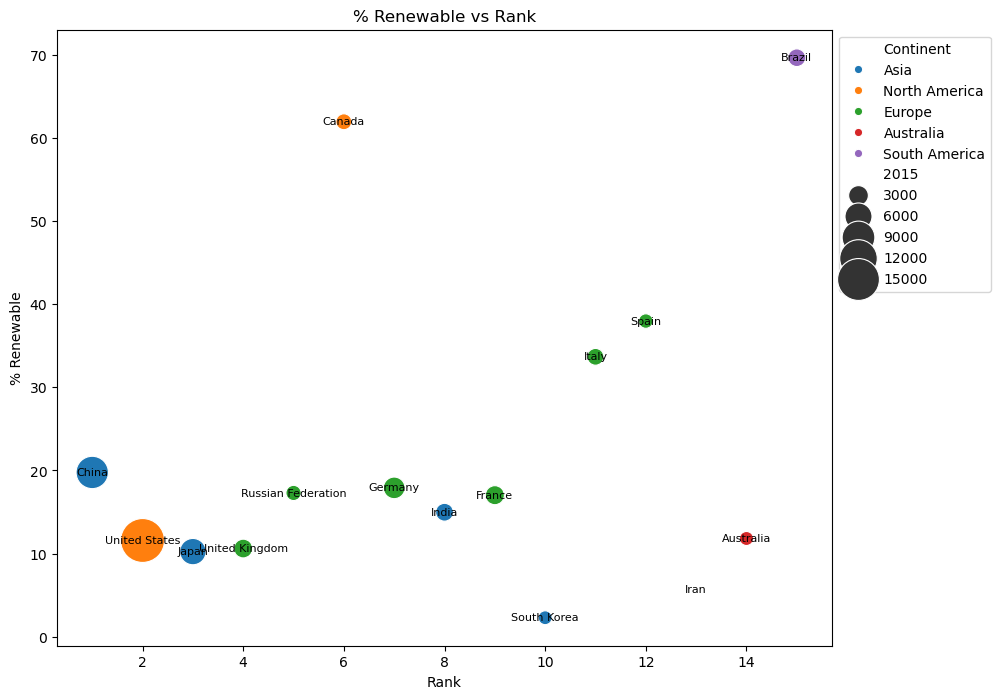

In [179]:
# Task 15: Bubble chart

plt.figure(figsize=(10, 8))
bubble_sizes = merged_df['2015'] / 1e9  # Scale GDP values
scatter = sns.scatterplot(
    data=merged_df,
    x='Rank',
    y='% Renewable',
    size=bubble_sizes,
    hue='Continent',
    sizes=(100, 1000),
)

for i, country in enumerate(merged_df.index):
    plt.text(
        x=merged_df.loc[country, 'Rank'],
        y=merged_df.loc[country, '% Renewable'],
        s=country, 
        fontsize=8, 
        ha='center',
        va='center',
        color='black',
    )

plt.title('% Renewable vs Rank')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
